# Iris - Classification

___

Let's solve the iris problem using some classification algorithms.

In [120]:
## the dataset
from sklearn.datasets import load_iris

## validating models
from sklearn.model_selection import cross_val_score

## preprocessing
from sklearn.preprocessing import StandardScaler

## models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression

## plotting results
from sklearn.metrics import classification_report

## auxiliary
import plotly.express as px
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')

In [115]:
x = load_iris().data
y = load_iris().target

In [54]:
df = DataFrame(x,columns = load_iris().feature_names).assign(species = y).assign(species = lambda x: x.species.replace({0:'setosa',1:'versicolor',2:'virginica'}))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


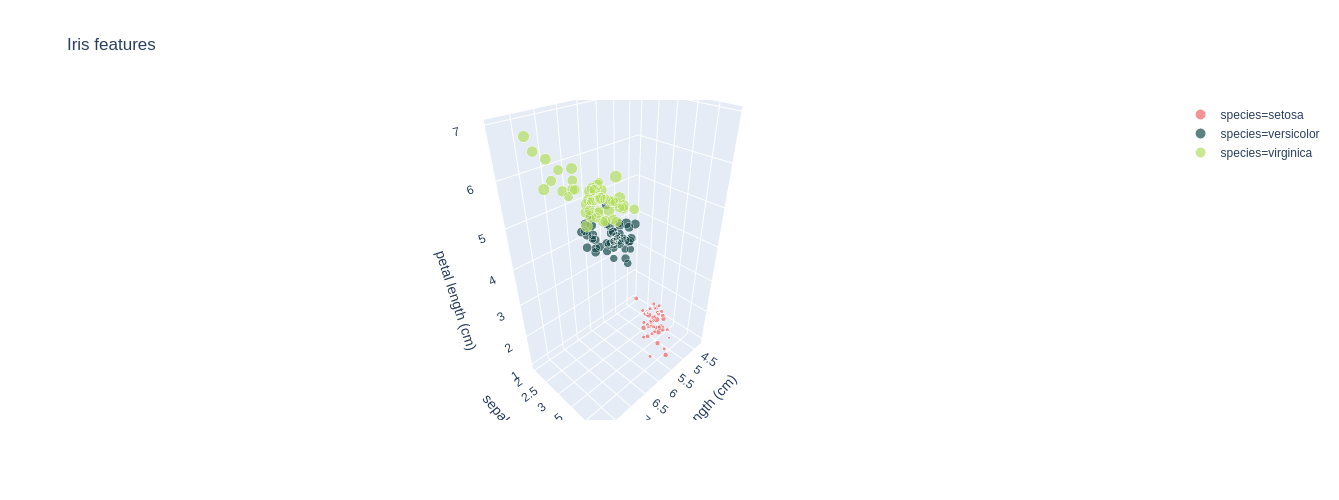

In [55]:
fig = px.scatter_3d(df, x = 'sepal length (cm)', y = 'sepal width (cm)', z = 'petal length (cm)', size = 'petal width (cm)', 
                    color = 'species', color_discrete_map= {'setosa':'#EE6565','versicolor':'#184C4C','virginica':'#B4DE5F'},
                    width=800,height=500,title='Iris features')
fig.show()

In [105]:
class MySolution():
    
    def __init__(self,x,y,metric,cv):
        ## initialing the class
        self.x = x
        self.y = y
        self.metric = metric
        self.cv = cv
        
    def create_models(self):
        
        ## instantiating the models
        self.tree = DecisionTreeClassifier(random_state=42)
        self.forest = RandomForestClassifier(random_state=42)      
        self.svc = SVC(random_state=42)
        self.knn = KNeighborsClassifier()
        self.sgd = SGDClassifier(random_state=42)
        self.logreg = LogisticRegression(random_state=42)
    
        
    def train(self,model):
        
        ## training the models
        if model == 'tree':
            return self.tree.fit(self.x,self.y)
        elif model == 'forest':
            return self.forest.fit(self.x,self.y)
        elif model == 'svc':
            return self.svc.fit(self._preprocessing(),self.y)
        elif model == 'knn':
            return self.knn.fit(self._preprocessing(),self.y)
        elif model == 'sgd':
            return self.sgd.fit(self._preprocessing(),self.y)
        elif model == 'logreg':
            return self.logreg.fit(self._preprocessing(),self.y)
          
    def _preprocessing(self):
        
        ## using standartscaler to scale x
        x_scaled = StandardScaler().fit_transform(self.x)
        
        return x_scaled
        
    def cv_models(self):
              
        print(' -- Comparing Models --\n')
        print(f'CV -> {self.cv} times     Metric -> {self.metric}\n')
        print(f'Decision Tree       : {cross_val_score(self.tree,self.x,self.y,cv=self.cv,scoring=self.metric).mean()}')
        print(f'Random Forest       : {cross_val_score(self.forest,self.x,self.y,cv=self.cv,scoring=self.metric).mean()}')
        print(f'SVC                 : {cross_val_score(self.svc,self._preprocessing(),self.y,cv=self.cv,scoring=self.metric).mean()}')
        print(f'KNN                 : {cross_val_score(self.knn,self._preprocessing(),self.y,cv=self.cv,scoring=self.metric).mean()}')
        print(f'SGD                 : {cross_val_score(self.sgd,self._preprocessing(),self.y,cv=self.cv,scoring=self.metric).mean()}')
        print(f'Logistic Regression : {cross_val_score(self.logreg,self._preprocessing(),self.y,cv=self.cv,scoring=self.metric).mean()}')

In [127]:
mysol = MySolution(x, y, metric = 'accuracy', cv = 10)
mysol.create_models()
mysol.cv_models()

 -- Comparing Models --

CV -> 10 times     Metric -> accuracy

Decision Tree       : 0.9533333333333334
Random Forest       : 0.9466666666666667
SVC                 : 0.9666666666666666
KNN                 : 0.9533333333333334
SGD                 : 0.9333333333333333
Logistic Regression : 0.9


Based on the results above lets use SVC with our data, but this time splitting in the traditional way.

In [145]:
## spliting in train and test
x_train,x_test,y_train,y_test = train_test_split(mysol._preprocessing(),y,test_size=.8,random_state=42)

## overwritting the training process of the svc by calling it again. This time only with x_train and y_train and lastly predicting with x_test
y_pred = mysol.train('svc').fit(x_train,y_train).predict(x_test)

In [146]:
## lets take a look, pretty good!

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.93      0.95      0.94        39
           2       0.95      0.92      0.93        38

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



Curious is that each datapoint is so representative of his own class that even using 80% of the dataset for testing we still got a very good accuracy.